In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams["font.family"] = "serif"

In [15]:
rfw_df = pd.read_csv("/media/global_data/fair_neural_compression_data/datasets/RFW/clean_metadata/clean.csv")
rfw_df.head()

,Unnamed: 0,File,Class_ID,skintype_type1,skintype_type2,skintype_type3,skintype_type4,skintype_type5,skintype_type6,lips_big,...,eye_normal,hairtype_bald,hairtype_curly,hairtype_straight,hairtype_wavy,haircolor_black,haircolor_blonde,haircolor_brown,haircolor_gray,haircolor_red
0,0,m.011y5k_0003.png,African/m.011y5k,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0
1,1,m.011y5k_0004.png,African/m.011y5k,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0
2,2,m.011y5k_0002.png,African/m.011y5k,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0
3,3,m.011y5k_0001.png,African/m.011y5k,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0
4,4,m.01257s_0002.png,African/m.01257s,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0


In [16]:
skin_type_columns = ['skintype_type1', 'skintype_type2', 'skintype_type3', 'skintype_type4', 'skintype_type5', 'skintype_type6']
lip_columns = ['lips_big', 'lips_small']
nose_columns = ['nose_narrow', 'nose_wide']
eye_columns = ['eye_narrow', 'eye_normal']
hair_type_columns = ['hairtype_bald', 'hairtype_curly', 'hairtype_straight', 'hairtype_wavy']
hair_color_columns = ['haircolor_black', 'haircolor_blonde', 'haircolor_brown', 'haircolor_gray', 'haircolor_red']
rfw_df['skin_type'] = rfw_df[skin_type_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=skin_type_columns)
rfw_df['lip_type'] = rfw_df[lip_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=lip_columns)
rfw_df['nose_type'] = rfw_df[nose_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=nose_columns)
rfw_df['eye_type'] = rfw_df[eye_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=eye_columns)
rfw_df['hair_type'] = rfw_df[hair_type_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=hair_type_columns)
rfw_df['hair_color'] = rfw_df[hair_color_columns].idxmax(axis=1)
rfw_df = rfw_df.drop(columns=hair_color_columns)


rfw_df['skin_type'] = rfw_df['skin_type'].str.replace('skintype_', '')
rfw_df['lip_type'] = rfw_df['lip_type'].str.replace('lips_', '')
rfw_df['nose_type'] = rfw_df['nose_type'].str.replace('nose_', '')
rfw_df['eye_type'] = rfw_df['eye_type'].str.replace('eye_', '')
rfw_df['hair_type'] = rfw_df['hair_type'].str.replace('hairtype_', '')
rfw_df['hair_color'] = rfw_df['hair_color'].str.replace('haircolor_', '')
rfw_df['Class_ID'] = rfw_df['Class_ID'].str.split('/').str[0]
rfw_df.rename(columns={'Class_ID': 'race'}, inplace=True)

rfw_df

,Unnamed: 0,File,race,skin_type,lip_type,nose_type,eye_type,hair_type,hair_color
0,0,m.011y5k_0003.png,African,type6,big,wide,normal,curly,black
1,1,m.011y5k_0004.png,African,type6,big,wide,normal,curly,black
2,2,m.011y5k_0002.png,African,type6,big,wide,normal,curly,black
3,3,m.011y5k_0001.png,African,type6,big,wide,normal,curly,black
4,4,m.01257s_0002.png,African,type5,big,wide,normal,curly,black
...,...,...,...,...,...,...,...,...,...
40602,40602,m.0vshsz9_0001.png,Indian,type4,big,wide,normal,straight,black
40603,40603,m.0_4pw_0001.png,Indian,type4,small,wide,normal,straight,black
40604,40604,m.0_4pw_0004.png,Indian,type4,small,wide,normal,straight,black
40605,40605,m.0_4pw_0003.png,Indian,type4,small,wide,normal,straight,black


In [17]:
print(rfw_df.loc[:, ['race', 'skin_type']][rfw_df.loc[:, ['race', 'skin_type']]['race'] == 'African']['skin_type'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'skin_type']][rfw_df.loc[:, ['race', 'skin_type']]['race'] == 'Asian']['skin_type'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'skin_type']][rfw_df.loc[:, ['race', 'skin_type']]['race'] == 'Caucasian']['skin_type'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'skin_type']][rfw_df.loc[:, ['race', 'skin_type']]['race'] == 'Indian']['skin_type'].value_counts().to_dict())

{'type5': 6034, 'type6': 4055, 'type4': 312, 'type3': 12, 'type2': 2}
{'type3': 5644, 'type4': 3522, 'type2': 464, 'type5': 55, 'type6': 3}
{'type3': 4880, 'type2': 4388, 'type4': 709, 'type1': 219}
{'type4': 7219, 'type3': 2717, 'type5': 246, 'type2': 126}


In [21]:
print(rfw_df.loc[:, ['race', 'hair_color']][rfw_df.loc[:, ['race', 'hair_color']]['race'] == 'African']['hair_color'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'hair_color']][rfw_df.loc[:, ['race', 'hair_color']]['race'] == 'Asian']['hair_color'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'hair_color']][rfw_df.loc[:, ['race', 'hair_color']]['race'] == 'Caucasian']['hair_color'].value_counts().to_dict())
print(rfw_df.loc[:, ['race', 'hair_color']][rfw_df.loc[:, ['race', 'hair_color']]['race'] == 'Indian']['hair_color'].value_counts().to_dict())

{'black': 9864, 'gray': 270, 'brown': 204, 'blonde': 56, 'red': 21}
{'black': 6589, 'brown': 2006, 'gray': 707, 'blonde': 260, 'red': 126}
{'brown': 4061, 'black': 2118, 'blonde': 2093, 'gray': 1706, 'red': 218}
{'black': 6875, 'brown': 1741, 'gray': 1598, 'red': 60, 'blonde': 34}


In [5]:
races = list(rfw_df['race'].unique())
print(races)
attributes = ['skin_type', 'lip_type', 'nose_type', 'eye_type', 'hair_type', 'hair_color']

['African', 'Asian', 'Caucasian', 'Indian']


In [6]:
SAVE_DIR = './figures'

attribute: skin_type
unique_values_dict: {'type1': [0, 0, 219, 0], 'type2': [2, 464, 4388, 126], 'type3': [12, 5644, 4880, 2717], 'type4': [312, 3522, 709, 7219], 'type5': [6034, 55, 0, 246], 'type6': [4055, 3, 0, 0]}
attribute: lip_type
unique_values_dict: {'big': [8181, 1973, 1389, 4618], 'small': [2234, 7715, 8807, 5690]}
attribute: nose_type
unique_values_dict: {'narrow': [1661, 5187, 5776, 4267], 'wide': [8754, 4501, 4420, 6041]}
attribute: eye_type
unique_values_dict: {'narrow': [85, 9207, 173, 25], 'normal': [10330, 481, 10023, 10283]}
attribute: hair_type
unique_values_dict: {'bald': [2320, 493, 745, 834], 'curly': [7751, 57, 331, 287], 'straight': [38, 7857, 6614, 6430], 'wavy': [306, 1281, 2506, 2757]}
attribute: hair_color
unique_values_dict: {'black': [9864, 6589, 2118, 6875], 'blonde': [56, 260, 2093, 34], 'brown': [204, 2006, 4061, 1741], 'gray': [270, 707, 1706, 1598], 'red': [21, 126, 218, 60]}


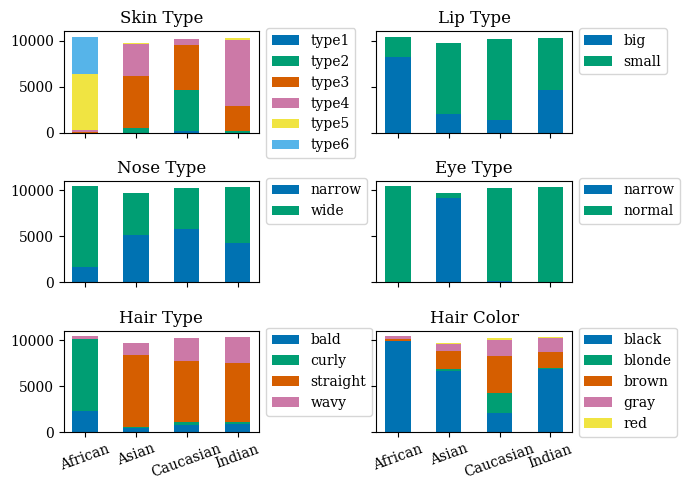

In [9]:
fig, axes = plt.subplots(3, 2, sharex=True,sharey=True,figsize=(7, 5))
axes = axes.flatten() # single index

for index, attribute in enumerate(attributes):
    print(f'attribute: {attribute}')
    attribute_df = rfw_df.loc[:, ['race', attribute]]
    unique_values = list(rfw_df[attribute].unique())
    unique_values.sort()
    unique_values_dict = {attribute: [0 for _ in races] for attribute in unique_values}
    for i, race in enumerate(races):
        attribute_race_df = attribute_df[attribute_df['race'] == race]
        attribute_race_dict = attribute_race_df[attribute].value_counts().to_dict()
        for value in attribute_race_dict:
            unique_values_dict[value][i] += attribute_race_dict[value]
            
    print(f'unique_values_dict: {unique_values_dict}')

    width = 0.5

    bottom = np.zeros(len(races))

    for boolean, weight_count in unique_values_dict.items():
        p = axes[index].bar(races, weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count
    axes[index].set_ylim([0, 11000])
    axes[index].set_title(f"{' '.join(attribute.split('_')).title()}")
    axes[index].tick_params(axis='x', labelrotation=20)
    axes[index].legend(loc='upper left', bbox_to_anchor=(1,1.1))

    # plt.savefig(f'{SAVE_DIR}/{attribute}.png')
fig.tight_layout()
fig.subplots_adjust(wspace=0.6)
plt.savefig(f'{SAVE_DIR}/distribution.pdf',dpi=200)
plt.show()


In [ ]:
unique_values_dict.keys()